In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import plotly.express as px
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
import scipy.stats as stats
import statsmodels.stats.multitest as smm

In [4]:
# The dataset includes the gene expression values of five
# types of cancer: lung adenocarcinoma (LUAD),
# breast invasive carcinoma (BRCA), kidney renal clear cell
# carcinoma (KIRC), lung squamous cell carcinoma (LUSC),
# and uterine corpus endometrial carcinoma (UCEC).

# https://data.mendeley.com/datasets/sf5n64hydt/1
# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL20573

In [5]:
dir = os.path.join('data', 'cancer types.mat')
mat = scipy.io.loadmat(dir)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 01 17:46:29 2017',
 '__version__': '1.0',
 '__globals__': [],
 'cancerTypes': array([[array(['BRCA'], dtype='<U4')],
        [array(['BRCA'], dtype='<U4')],
        [array(['BRCA'], dtype='<U4')],
        ...,
        [array(['UCEC'], dtype='<U4')],
        [array(['UCEC'], dtype='<U4')],
        [array(['UCEC'], dtype='<U4')]], dtype=object),
 'data': array([[44.02354236,  9.21628619, 11.31907844, ...,  4.2956195 ,
          8.76876844,  1.        ],
        [29.74615746,  9.7656002 , 40.540128  , ...,  3.81901941,
          5.75850117,  1.        ],
        [35.79931536,  9.88478062,  3.886043  , ...,  4.38238737,
          5.30617722,  1.        ],
        ...,
        [14.66541424, 20.19564581,  6.7034771 , ...,  1.83021579,
          2.35529186,  5.        ],
        [31.11602192, 14.56206615,  9.12158501, ...,  1.17613142,
          1.89129728,  5.        ],
        [74.04662769, 13.00396207,  9.47227364

In [6]:
print('\n'.join([key for key in mat.keys()]))

__header__
__version__
__globals__
cancerTypes
data
geneIds


In [7]:
# cancer type for each row in the data
mat['cancerTypes'].shape

(2086, 1)

In [8]:
cancerTypes = [type[0][0] for type in mat['cancerTypes']]
cancerTypes[:5]

['BRCA', 'BRCA', 'BRCA', 'BRCA', 'BRCA']

In [9]:
# gene expression values
mat['data'].shape

(2086, 972)

In [10]:
# gene names
mat['geneIds'].shape

(1, 971)

In [11]:
data = mat['data'][:,:971] # removed column indicating cancer type
data.shape

(2086, 971)

In [12]:
genes = [id[0]for id in mat['geneIds'][0]]
genes[:5]

['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3']

In [13]:
encoded_types = mat['data'][:,971]
encoded_types = encoded_types - 1 # zero-indexed
np.unique(encoded_types)

array([0., 1., 2., 3., 4.])

In [14]:
encoded_types.shape

(2086,)

In [15]:
df = pd.DataFrame(data=data, columns=genes)
df

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
0,44.023542,9.216286,11.319078,33.215176,16.901427,9.031338,1.109961,20.017821,16.724363,10.494192,...,29.275809,21.706486,16.315579,4.224009,8.602081,23.762341,8.302416,1.408731,4.295620,8.768768
1,29.746157,9.765600,40.540128,30.169134,20.047393,32.237287,2.460624,17.029112,28.346167,17.017284,...,65.896789,12.815215,10.150965,8.914809,6.797915,15.379187,11.420690,6.599729,3.819019,5.758501
2,35.799315,9.884781,3.886043,29.984211,17.135946,21.273727,1.501203,20.598204,25.855152,12.275738,...,44.571276,14.344729,11.224647,7.870991,7.724003,25.762396,8.628786,4.104879,4.382387,5.306177
3,26.490401,7.085828,10.804003,23.482255,17.044085,14.880104,1.299056,14.978582,31.214294,10.015235,...,51.223656,13.660995,9.730124,7.804760,5.030966,8.964868,7.990036,4.251886,3.702483,7.500498
4,27.632466,7.642971,3.670265,16.584843,20.375321,22.174600,1.553541,14.909150,54.435490,13.392213,...,55.927277,16.650019,8.584938,7.485410,5.945771,9.205302,8.761025,4.656969,3.827945,7.939863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,23.758989,15.394219,10.883932,21.691852,20.209391,30.078659,0.978559,13.002383,28.629486,6.387968,...,19.716977,10.900725,4.188131,2.499783,2.422833,10.061337,3.966998,2.323246,42.449235,2.661792
2082,27.990210,28.998590,8.701462,27.579071,29.770012,15.744797,3.759037,13.468529,20.548527,5.557939,...,38.833607,13.409906,8.146828,3.390904,3.621281,18.706152,4.272848,1.199481,3.990134,1.665184
2083,14.665414,20.195646,6.703477,19.648529,12.530305,24.321260,2.263398,9.642926,30.248579,22.157856,...,29.583893,4.310888,7.920039,2.731255,4.168946,4.470333,3.064729,1.341491,1.830216,2.355292
2084,31.116022,14.562066,9.121585,13.831678,15.535040,41.278765,1.044817,8.012867,8.701291,4.777847,...,15.115717,5.303415,3.716170,1.802522,1.466401,4.209371,2.633839,0.908784,1.176131,1.891297


In [16]:
X = df.values
X

array([[44.02354236,  9.21628619, 11.31907844, ...,  1.40873072,
         4.2956195 ,  8.76876844],
       [29.74615746,  9.7656002 , 40.540128  , ...,  6.59972888,
         3.81901941,  5.75850117],
       [35.79931536,  9.88478062,  3.886043  , ...,  4.10487884,
         4.38238737,  5.30617722],
       ...,
       [14.66541424, 20.19564581,  6.7034771 , ...,  1.34149059,
         1.83021579,  2.35529186],
       [31.11602192, 14.56206615,  9.12158501, ...,  0.9087842 ,
         1.17613142,  1.89129728],
       [74.04662769, 13.00396207,  9.47227364, ...,  4.25296664,
         4.33718205,  9.33315169]])

In [17]:
y = encoded_types
y

array([0., 0., 0., ..., 4., 4., 4.])

In [18]:
scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[ 0.17836082, -0.38885229, -0.25400484, ..., -1.04988521,
         0.24837591,  0.77270934],
       [-0.5282126 , -0.32843441,  0.64026652, ...,  1.12750571,
         0.05306413, -0.16047082],
       [-0.22864791, -0.31532601, -0.481483  , ...,  0.08102801,
         0.28393357, -0.30069084],
       ...,
       [-1.27454343,  0.81874406, -0.39525918, ..., -1.07808943,
        -0.76195199, -1.21546267],
       [-0.46041939,  0.19911865, -0.3212562 , ..., -1.25959035,
        -1.02999721, -1.35930057],
       [ 1.66417313,  0.0277461 , -0.31052384, ...,  0.1431442 ,
         0.26540833,  0.94766764]])

In [19]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
principal_df

,PC1,PC2,PC3
0,1.944555,-5.781887,-0.076199
1,6.685335,-10.197388,-8.019990
2,8.753383,-3.274183,-9.731203
3,5.971544,0.610894,-9.492821
4,4.992904,-1.638601,-12.268772
...,...,...,...
2081,-2.172339,20.524243,-5.028996
2082,1.122024,17.474741,-3.003945
2083,-8.299643,12.981320,-0.523163
2084,-16.151747,13.746504,-4.113251


In [20]:
final_df = pd.concat([principal_df, pd.DataFrame(cancerTypes)], axis=1)
final_df.rename(columns={0:'cancer_type'}, inplace=True)
final_df

,PC1,PC2,PC3,cancer_type
0,1.944555,-5.781887,-0.076199,BRCA
1,6.685335,-10.197388,-8.019990,BRCA
2,8.753383,-3.274183,-9.731203,BRCA
3,5.971544,0.610894,-9.492821,BRCA
4,4.992904,-1.638601,-12.268772,BRCA
...,...,...,...,...
2081,-2.172339,20.524243,-5.028996,UCEC
2082,1.122024,17.474741,-3.003945,UCEC
2083,-8.299643,12.981320,-0.523163,UCEC
2084,-16.151747,13.746504,-4.113251,UCEC


In [21]:
loadings = pd.DataFrame(pca.components_.T)
loadings.columns = ['PC1', 'PC2', 'PC3']
loadings['gene'] = genes
loadings = loadings[['gene', 'PC1', 'PC2', 'PC3']]
loadings

,gene,PC1,PC2,PC3
0,AARS,0.038193,0.008083,0.034775
1,ABCB6,0.001169,0.036301,0.033037
2,ABCC5,0.031167,0.002968,0.033554
3,ABCF1,0.057150,0.012712,0.027749
4,ABCF3,0.031732,0.025511,0.026951
...,...,...,...,...
966,ZNF395,-0.048116,-0.030328,0.027157
967,ZNF451,0.028892,-0.061565,0.005646
968,ZNF586,0.035258,-0.025104,-0.045507
969,ZNF589,0.020521,0.022526,-0.032895


In [22]:
loadings['sum'] = loadings['PC1'] + loadings['PC2'] + loadings['PC3']
loadings

,gene,PC1,PC2,PC3,sum
0,AARS,0.038193,0.008083,0.034775,0.081051
1,ABCB6,0.001169,0.036301,0.033037,0.070507
2,ABCC5,0.031167,0.002968,0.033554,0.067689
3,ABCF1,0.057150,0.012712,0.027749,0.097610
4,ABCF3,0.031732,0.025511,0.026951,0.084193
...,...,...,...,...,...
966,ZNF395,-0.048116,-0.030328,0.027157,-0.051287
967,ZNF451,0.028892,-0.061565,0.005646,-0.027026
968,ZNF586,0.035258,-0.025104,-0.045507,-0.035353
969,ZNF589,0.020521,0.022526,-0.032895,0.010151


In [23]:
loadings.sort_values(by=['sum'], ascending=False)

,gene,PC1,PC2,PC3,sum
130,CDC45,0.051073,0.043605,0.060150,0.154828
115,CCNB2,0.059255,0.039169,0.050602,0.149027
633,PLK1,0.056618,0.048097,0.040673,0.145388
60,AURKB,0.042797,0.062401,0.038787,0.143985
126,CDC20,0.046564,0.057282,0.039734,0.143580
...,...,...,...,...,...
286,FAM63A,0.025570,-0.038748,-0.077295,-0.090473
39,ARHGEF12,-0.016270,-0.073907,-0.003623,-0.093800
33,APBB2,0.015465,-0.056570,-0.060082,-0.101186
722,REEP5,0.005292,-0.057269,-0.056504,-0.108482


In [24]:
fig = px.scatter_3d(final_df,
                    x='PC1', y='PC2', z='PC3',
                    color='cancer_type',
                    width=1000, height=800,
                    opacity=1
                    )

fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')
                              ),
                  )

fig.show()

In [25]:
tsne = TSNE(n_components=3).fit_transform(scaled_X)
principal_df = pd.DataFrame(data=tsne, columns=['t-SNE_1', 't-SNE_2', 't-SNE_3'])
final_df = pd.concat([principal_df, pd.DataFrame(cancerTypes)], axis=1)
final_df.rename(columns={0:'cancer_type'}, inplace=True)
final_df

,t-SNE_1,t-SNE_2,t-SNE_3,cancer_type
0,4.536256,-7.580103,3.328471,BRCA
1,10.190819,-5.207385,-3.957795,BRCA
2,6.813982,-1.661751,-7.576553,BRCA
3,4.309262,-1.504863,-7.179687,BRCA
4,6.090854,1.476280,-9.550762,BRCA
...,...,...,...,...
2081,-1.458568,8.982393,-2.674305,UCEC
2082,-0.885309,9.701230,0.024168,UCEC
2083,-3.469497,7.834735,-0.851068,UCEC
2084,-6.293484,6.340428,-3.596729,UCEC


In [26]:
fig = px.scatter_3d(final_df,
                    x='t-SNE_1', y='t-SNE_2', z='t-SNE_3',
                    color='cancer_type',
                    width=1000, height=800,
                    opacity=1
                    )

fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')
                              ),
                  )

fig.show()

In [27]:
data = pd.DataFrame(data = mat['data'][:,:971], columns=genes)
data

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
0,44.023542,9.216286,11.319078,33.215176,16.901427,9.031338,1.109961,20.017821,16.724363,10.494192,...,29.275809,21.706486,16.315579,4.224009,8.602081,23.762341,8.302416,1.408731,4.295620,8.768768
1,29.746157,9.765600,40.540128,30.169134,20.047393,32.237287,2.460624,17.029112,28.346167,17.017284,...,65.896789,12.815215,10.150965,8.914809,6.797915,15.379187,11.420690,6.599729,3.819019,5.758501
2,35.799315,9.884781,3.886043,29.984211,17.135946,21.273727,1.501203,20.598204,25.855152,12.275738,...,44.571276,14.344729,11.224647,7.870991,7.724003,25.762396,8.628786,4.104879,4.382387,5.306177
3,26.490401,7.085828,10.804003,23.482255,17.044085,14.880104,1.299056,14.978582,31.214294,10.015235,...,51.223656,13.660995,9.730124,7.804760,5.030966,8.964868,7.990036,4.251886,3.702483,7.500498
4,27.632466,7.642971,3.670265,16.584843,20.375321,22.174600,1.553541,14.909150,54.435490,13.392213,...,55.927277,16.650019,8.584938,7.485410,5.945771,9.205302,8.761025,4.656969,3.827945,7.939863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,23.758989,15.394219,10.883932,21.691852,20.209391,30.078659,0.978559,13.002383,28.629486,6.387968,...,19.716977,10.900725,4.188131,2.499783,2.422833,10.061337,3.966998,2.323246,42.449235,2.661792
2082,27.990210,28.998590,8.701462,27.579071,29.770012,15.744797,3.759037,13.468529,20.548527,5.557939,...,38.833607,13.409906,8.146828,3.390904,3.621281,18.706152,4.272848,1.199481,3.990134,1.665184
2083,14.665414,20.195646,6.703477,19.648529,12.530305,24.321260,2.263398,9.642926,30.248579,22.157856,...,29.583893,4.310888,7.920039,2.731255,4.168946,4.470333,3.064729,1.341491,1.830216,2.355292
2084,31.116022,14.562066,9.121585,13.831678,15.535040,41.278765,1.044817,8.012867,8.701291,4.777847,...,15.115717,5.303415,3.716170,1.802522,1.466401,4.209371,2.633839,0.908784,1.176131,1.891297


In [28]:
data = data.T
data

,0,1,2,3,4,5,6,7,8,9,...,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085
AARS,44.023542,29.746157,35.799315,26.490401,27.632466,32.046192,37.176767,71.272871,39.924566,24.747010,...,19.894682,13.602171,41.316816,34.563101,38.003479,23.758989,27.990210,14.665414,31.116022,74.046628
ABCB6,9.216286,9.765600,9.884781,7.085828,7.642971,8.419004,7.449734,8.224724,2.535918,8.214457,...,23.186359,8.850736,10.844355,29.837752,9.408324,15.394219,28.998590,20.195646,14.562066,13.003962
ABCC5,11.319078,40.540128,3.886043,10.804003,3.670265,14.540679,13.598654,4.675322,10.070192,9.055250,...,7.579910,10.386364,18.336716,33.754674,7.147210,10.883932,8.701462,6.703477,9.121585,9.472274
ABCF1,33.215176,30.169134,29.984211,23.482255,16.584843,28.260823,26.924645,21.374021,44.952255,22.329043,...,14.135698,15.175355,64.742876,16.321942,30.305133,21.691852,27.579071,19.648529,13.831678,37.000833
ABCF3,16.901427,20.047393,17.135946,17.044085,20.375321,24.671378,23.875332,17.651699,8.639155,17.008653,...,15.597582,10.300729,43.790545,37.483139,25.411254,20.209391,29.770012,12.530305,15.535040,19.295983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF395,23.762341,15.379187,25.762396,8.964868,9.205302,11.679009,10.607159,11.434852,10.507830,12.455933,...,3.664107,3.518864,11.701862,3.033824,12.321234,10.061337,18.706152,4.470333,4.209371,9.271268
ZNF451,8.302416,11.420690,8.628786,7.990036,8.761025,7.094010,7.719488,12.357211,9.488900,7.715904,...,3.411428,6.175532,6.342709,2.924051,4.108939,3.966998,4.272848,3.064729,2.633839,4.530131
ZNF586,1.408731,6.599729,4.104879,4.251886,4.656969,2.241316,4.659310,3.247042,4.813417,2.149552,...,4.176940,3.101447,7.839858,5.868899,0.710264,2.323246,1.199481,1.341491,0.908784,4.252967
ZNF589,4.295620,3.819019,4.382387,3.702483,3.827945,1.539085,2.690304,2.224599,4.639338,3.503726,...,7.886743,7.740845,6.293862,3.184035,2.211446,42.449235,3.990134,1.830216,1.176131,4.337182


In [29]:
cancerTypes = np.array(cancerTypes)
cancerTypes

array(['BRCA', 'BRCA', 'BRCA', ..., 'UCEC', 'UCEC', 'UCEC'], dtype='<U4')

In [30]:
uniqueCancerTypes = np.unique(cancerTypes)
uniqueCancerTypes

array(['BRCA', 'KIRC', 'LUAD', 'LUSC', 'UCEC'], dtype='<U4')

In [31]:
p_values = []
for gene in data.index:
    # Collecting the gene expression data for each cancer type
    groups = [data.loc[gene][cancerTypes == ct] for ct in uniqueCancerTypes]

    # Performing ANOVA
    f_stat, p_val = stats.f_oneway(*groups)
    p_values.append(p_val)

# Adjusting for multiple testing
adjusted_p_values = smm.multipletests(p_values, method='fdr_bh')[1]

# Creating a DataFrame for results
results = pd.DataFrame({
    'Gene': data.index,
    'Adjusted P-Value': adjusted_p_values
})

# Filtering for significant results
significant_genes = results[results['Adjusted P-Value'] < 0.05]
print(significant_genes)

       Gene  Adjusted P-Value
0      AARS      2.173532e-23
1     ABCB6      3.666156e-65
2     ABCC5     6.643355e-151
3     ABCF1      2.968575e-88
4     ABCF3     3.202864e-108
..      ...               ...
966  ZNF395      0.000000e+00
967  ZNF451     4.315376e-128
968  ZNF586     2.167060e-109
969  ZNF589     9.611544e-110
970    ZW10     1.797534e-122

[971 rows x 2 columns]


In [32]:
df

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
0,44.023542,9.216286,11.319078,33.215176,16.901427,9.031338,1.109961,20.017821,16.724363,10.494192,...,29.275809,21.706486,16.315579,4.224009,8.602081,23.762341,8.302416,1.408731,4.295620,8.768768
1,29.746157,9.765600,40.540128,30.169134,20.047393,32.237287,2.460624,17.029112,28.346167,17.017284,...,65.896789,12.815215,10.150965,8.914809,6.797915,15.379187,11.420690,6.599729,3.819019,5.758501
2,35.799315,9.884781,3.886043,29.984211,17.135946,21.273727,1.501203,20.598204,25.855152,12.275738,...,44.571276,14.344729,11.224647,7.870991,7.724003,25.762396,8.628786,4.104879,4.382387,5.306177
3,26.490401,7.085828,10.804003,23.482255,17.044085,14.880104,1.299056,14.978582,31.214294,10.015235,...,51.223656,13.660995,9.730124,7.804760,5.030966,8.964868,7.990036,4.251886,3.702483,7.500498
4,27.632466,7.642971,3.670265,16.584843,20.375321,22.174600,1.553541,14.909150,54.435490,13.392213,...,55.927277,16.650019,8.584938,7.485410,5.945771,9.205302,8.761025,4.656969,3.827945,7.939863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,23.758989,15.394219,10.883932,21.691852,20.209391,30.078659,0.978559,13.002383,28.629486,6.387968,...,19.716977,10.900725,4.188131,2.499783,2.422833,10.061337,3.966998,2.323246,42.449235,2.661792
2082,27.990210,28.998590,8.701462,27.579071,29.770012,15.744797,3.759037,13.468529,20.548527,5.557939,...,38.833607,13.409906,8.146828,3.390904,3.621281,18.706152,4.272848,1.199481,3.990134,1.665184
2083,14.665414,20.195646,6.703477,19.648529,12.530305,24.321260,2.263398,9.642926,30.248579,22.157856,...,29.583893,4.310888,7.920039,2.731255,4.168946,4.470333,3.064729,1.341491,1.830216,2.355292
2084,31.116022,14.562066,9.121585,13.831678,15.535040,41.278765,1.044817,8.012867,8.701291,4.777847,...,15.115717,5.303415,3.716170,1.802522,1.466401,4.209371,2.633839,0.908784,1.176131,1.891297


In [36]:
df_z = df.apply(stats.zscore, axis=0)
df_z

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
0,0.178361,-0.388852,-0.254005,0.531978,-0.192159,-1.073603,-0.752276,1.396269,-0.635693,-0.330174,...,-0.053442,1.332287,0.843825,-0.710251,1.140875,-0.080738,0.085947,-1.049885,0.248376,0.772709
1,-0.528213,-0.328434,0.640267,0.270590,0.081560,0.780294,-0.471584,0.789358,0.009261,0.224664,...,1.863100,0.067467,-0.248844,0.560746,0.521345,-0.339528,0.983274,1.127506,0.053064,-0.160471
2,-0.228648,-0.315326,-0.481483,0.254721,-0.171754,-0.095573,-0.670969,1.514126,-0.128978,-0.178640,...,0.747040,0.285046,-0.058536,0.277918,0.839353,-0.018995,0.179865,0.081028,0.283934,-0.300691
3,-0.689337,-0.623177,-0.269768,-0.303227,-0.179747,-0.606352,-0.712979,0.372961,0.168429,-0.370913,...,1.095189,0.187782,-0.323438,0.259973,-0.085405,-0.537539,-0.003945,0.142691,0.005307,0.379547
4,-0.632817,-0.561898,-0.488087,-0.895111,0.110091,-0.023603,-0.660092,0.358861,1.457093,-0.083675,...,1.341351,0.612983,-0.526421,0.173443,0.228729,-0.530117,0.217918,0.312605,0.056722,0.515749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,-0.824512,0.290645,-0.267322,-0.456866,0.095654,0.607843,-0.779584,-0.028342,0.024984,-0.679439,...,-0.553699,-0.204878,-1.305749,-1.177440,-0.981008,-0.503691,-1.161630,-0.666287,15.883812,-1.120448
2082,-0.615113,1.786961,-0.334114,0.048330,0.927487,-0.537273,-0.201751,0.066317,-0.423470,-0.750040,...,0.446761,0.152064,-0.604075,-0.935986,-0.569474,-0.236823,-1.073617,-1.137656,0.123187,-1.429396
2083,-1.274543,0.818744,-0.395259,-0.632209,-0.572473,0.147891,-0.512571,-0.710540,0.114836,0.661909,...,-0.037318,-1.142309,-0.644273,-1.114721,-0.381412,-0.676287,-1.421270,-1.078089,-0.761952,-1.215463
2084,-0.460419,0.199119,-0.321256,-1.131367,-0.311043,1.502607,-0.765814,-1.041553,-1.080935,-0.816392,...,-0.794503,-1.001118,-1.389403,-1.366366,-1.309435,-0.684343,-1.545265,-1.259590,-1.029997,-1.359301


/Users/ninaadkalla/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



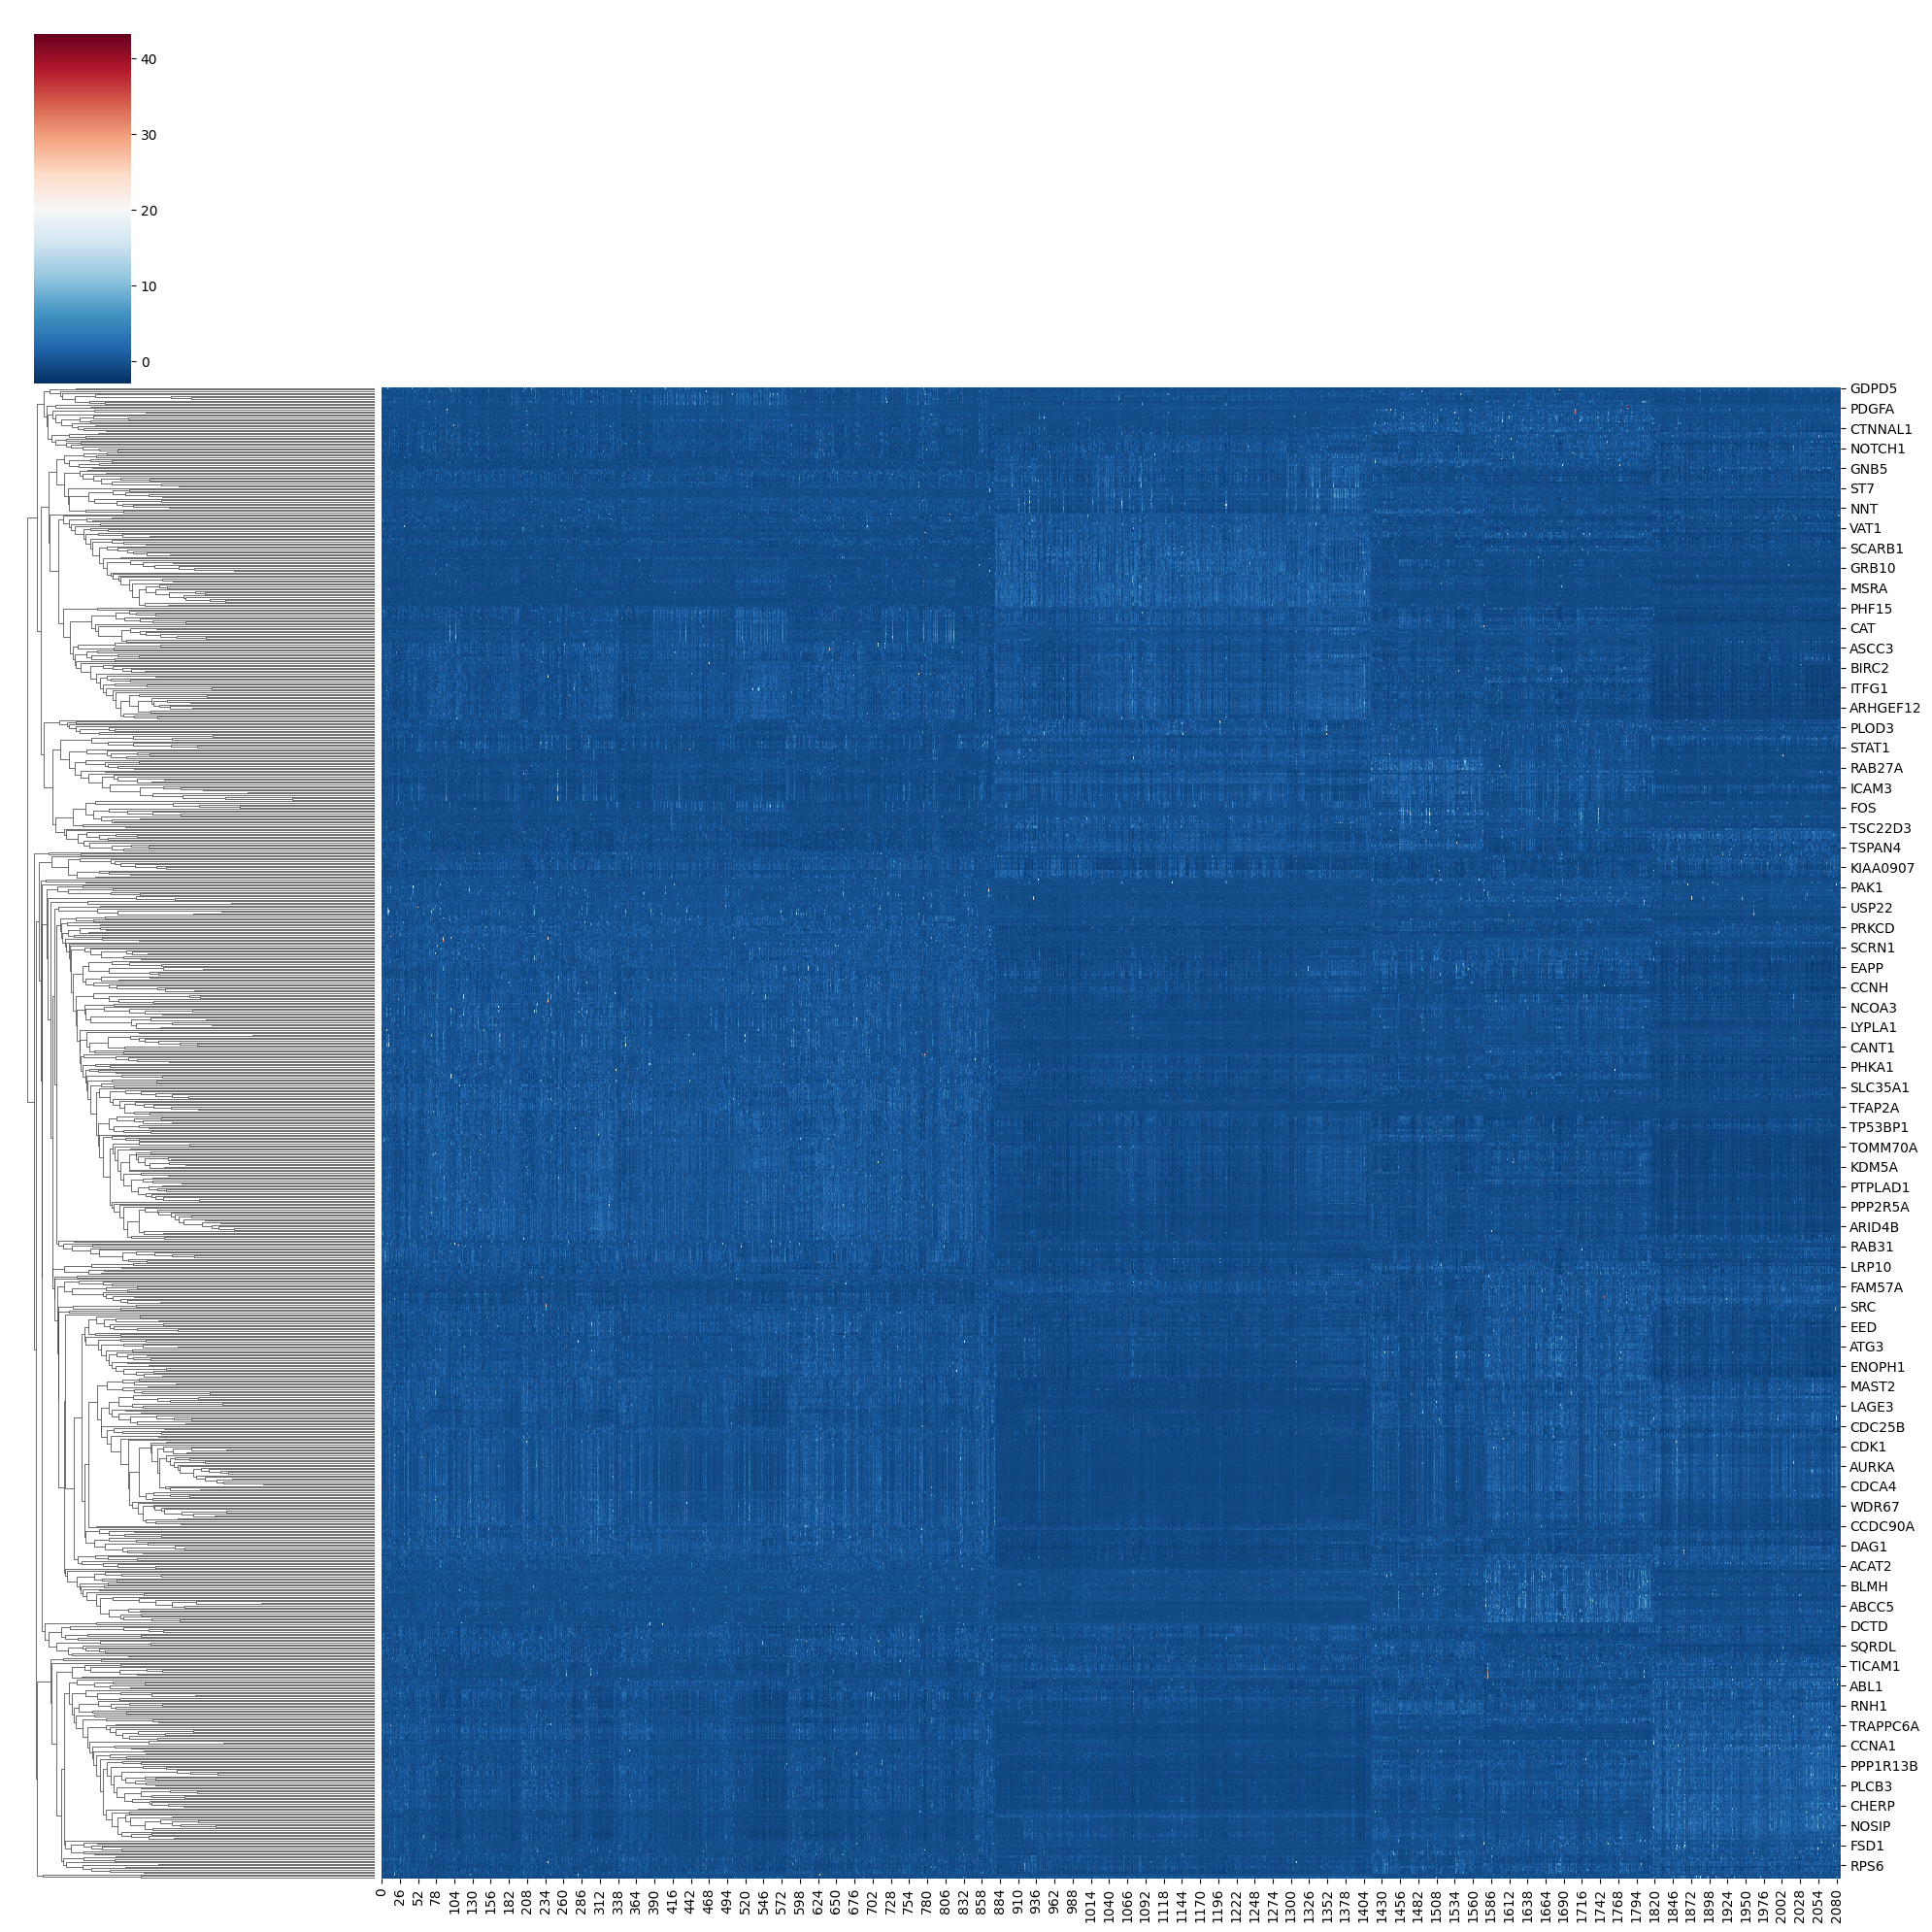

In [90]:
sns.clustermap(df.T, cmap='RdBu_r', z_score=0, col_cluster=False, row_cluster=True, figsize=(20, 20))